In [ ]:
#!pip install openai ydata-profiling

In [1]:
from openai import OpenAI
import csv
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

C:\Program Files\Python311\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Program Files\Python311\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [2]:
client = OpenAI(
    api_key="",
)

In [3]:
#https://github.com/openai/openai-python
def generate_conversation(prompt, max_tokens):
    response = client.chat.completions.create(
        #model="gpt-3.5-turbo",#"is the flagship model of this family, supports a 16K context window and is optimized for dialog."
        model="gpt-4-1106-preview",
        messages=prompt,
        max_tokens=max_tokens,
        temperature=0.7
    )
    return response.choices[0].message.content

In [36]:
dataset = []
categories = ['first participant in conversation is deceiving the second one', 
              'second participant in conversation is deceiving the first one', 
              'both participants in conversation are deceiving each other', 
              'none of participants in conversation try to deceive the other one'
             ]

number_of_conversations = 3

for _ in range(number_of_conversations):
    for category in categories:
        prompt = [{
            "role": "user",
           "content":f"""Create a very long conversation where {category}. The conversation should be coherent and realistic. The template should be as follow:
             A: 
             B: 
             and do not use specific names for participants
             """
        }]
        conversation = generate_conversation(prompt, 3000)  # roughly number of words
        word_count = len(conversation.split())

        if category == 'first participant in conversation is deceiving the second one':
            A_bad_intent = 1
            B_bad_intent = 0
        elif category == 'second participant in conversation is deceiving the first one':
            A_bad_intent = 0
            B_bad_intent = 1
        elif category == 'both participants in conversation are deceiving each other':
            A_bad_intent = 1
            B_bad_intent = 1
        elif  category == 'none of participants in conversation try to deceive the other one':
            A_bad_intent = 0
            B_bad_intent = 0

        print(category)
        print(conversation)
        print(word_count)

        # check the desired word limit
        #word_limit = (500, 1000)
        #if word_limit[0] <= word_count <= word_limit[1]:
        dataset.append({'category': category,
                        'conversation': conversation , 
                        'word_count' : word_count,
                        'A_bad_intent' : A_bad_intent ,
                        'B_bad_intent' : B_bad_intent
                       })


first participant in conversation is deceiving the second one
A: Hey, I've been meaning to tell you about this incredible investment opportunity I recently stumbled upon. It's a ground-floor chance to get in on this new cryptocurrency that's about to explode in value.

B: Really? I've heard a lot about crypto recently but haven't looked into it much. What's it called, and how does it work?

A: It's called CryptoGoldX, and the amazing thing about it is that it's linked to actual gold reserves. So, unlike other cryptocurrencies, it has a real, tangible value behind it.

B: That sounds interesting. But isn't the crypto market kind of volatile? I'm not sure if I'm ready to take on that kind of risk.

A: I totally get that, but that's the beauty of CryptoGoldX. Because it's backed by gold, it's much more stable than other coins. And the team behind it, they're industry veterans with a proven track record. They've been in blockchain technology since the beginning.

B: Okay, but how exactly w

none of participants in conversation try to deceive the other one
A: Hey, have you seen the latest report on climate change? It's pretty worrying how the numbers are looking.

B: Yeah, I have. The rate of ice melt in the Arctic is alarming. It seems every new report is more dire than the last.

A: What do you think we, as individuals, can do about it? Sometimes it feels like the problem is too big for one person to make a difference.

B: It does feel overwhelming at times, but I think there are actions we can take. Reducing our carbon footprint by using public transportation, eating less meat, and being mindful about energy consumption can help.

A: That's true. I've started to bike to work instead of driving. It's a small change, but I guess if enough people do it, it adds up.

B: Exactly. And on a larger scale, we can vote for policies and leaders who prioritize the environment. Policy changes can lead to big shifts in how society operates.

A: Speaking of policy, what's your take on

both participants in conversation are deceiving each other
A: Hey, long time no see! How have you been?

B: Oh, I've been great! I actually just got back from a trip to Europe. Business is booming, you know?

A: Europe, huh? That sounds amazing. I've been good too, just got promoted at work. The hours are crazy, but I can't complain.

B: Congratulations on the promotion! I know how hard you've been working towards that. As for my trip, it was fantastic. Paris, Rome, Berlin—you name it. We're expanding the business into the European market.

A: That's impressive. I've been so busy with the new position that I haven't had much time for travel. But I'm actually in the process of buying this new house. It's a bit of a fixer-upper but in a perfect location.

B: A new house? That's a big step, good for you! I've been thinking of investing in property myself, especially after the success we've had this quarter. Things really took off faster than I anticipated.

A: It sounds like your company 

second participant in conversation is deceiving the first one
A: Hey, I've been thinking about that investment opportunity you mentioned last time. Could you tell me more about it?

B: Absolutely! It's actually a fantastic opportunity. We're talking about investing in a company that's about to go big in the tech industry. They've developed a groundbreaking algorithm.

A: That sounds intriguing. What kind of algorithm is it?

B: It's a bit technical, but in simple terms, it's an AI that can predict market trends with incredible accuracy. They're still in the startup phase, but the potential is huge.

A: Predicting market trends? That does sound like it could be profitable. How did you find out about this company?

B: I have a few connections in the tech world. A close friend of mine is involved with the company, and he's been keeping me in the loop. We're getting in at just the right time.

A: I see. Do you have any documentation or a prospectus that I could look at?

B: I do, but it's 

In [37]:
# save the dataset
with open('conversation_dataset.csv', 'a+', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['category', 'conversation',  'word_count', 'A_bad_intent' , 'B_bad_intent' ])
    #writer.writeheader()
    writer.writerows(dataset)

In [38]:
df = pd.read_csv('conversation_dataset.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      64 non-null     object 
 1   conversation  64 non-null     object 
 2   word_count    64 non-null     int64  
 3   A_bad_intent  64 non-null     float64
 4   B_bad_intent  64 non-null     float64
 5   description   1 non-null      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ KB


In [39]:
df

,category,conversation,word_count,A_bad_intent,B_bad_intent,description
0,first participant in conversation is deceiving...,"A: Hey, I have something really important to t...",437,1.0,0.0,NaN
1,second participant in conversation is deceivin...,"A: Hey Sarah, I heard you recently went on a t...",368,0.0,1.0,NaN
2,both participants in conversation are deceivin...,"A: Hey, how have you been? It's been a while s...",400,1.0,1.0,NaN
3,none of participants in conversation try to de...,A: Hey Sarah! How was your weekend?\n\nB: Hi M...,494,0.0,0.0,NaN
4,first participant in conversation is deceiving...,A: Hey there! How are you doing today?\n\nB: H...,534,1.0,0.0,NaN
...,...,...,...,...,...,...
95,none of participants in conversation try to de...,A: Good morning! How are you today?\n\nB: I'm ...,714,0.0,0.0,NaN
96,first participant in conversation is deceiving...,"A: Hey, how have you been? I was just thinking...",560,1.0,0.0,NaN
97,second participant in conversation is deceivin...,"A: Hey, I've been thinking about that investme...",724,0.0,1.0,NaN
98,both participants in conversation are deceivin...,"A: Hey, long time no see! How have you been?\n...",556,1.0,1.0,NaN


In [22]:
#ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: ylabel='word_count'>

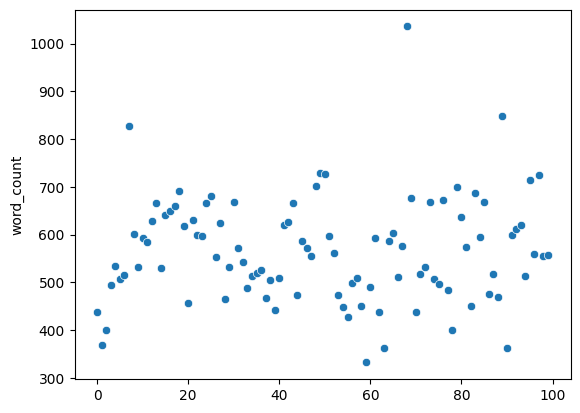

In [40]:
sns.scatterplot(df['word_count'])

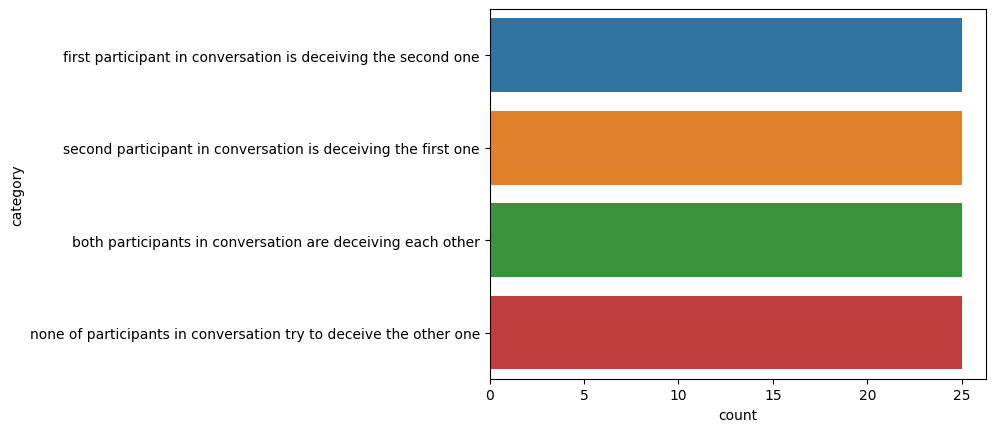

In [41]:
ax = sns.countplot(df, y = 'category')

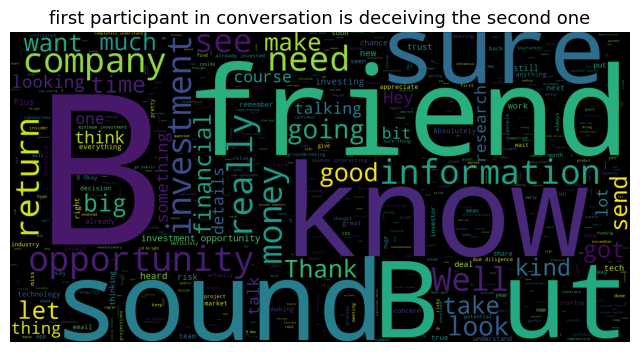

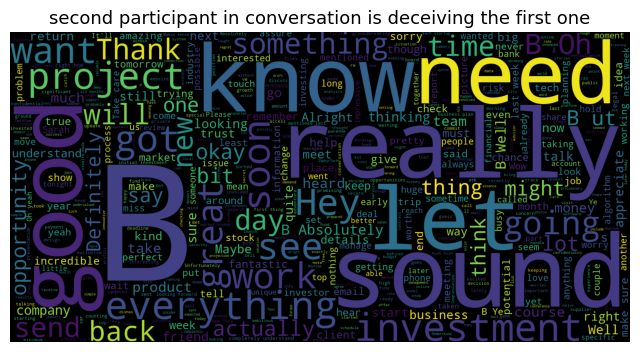

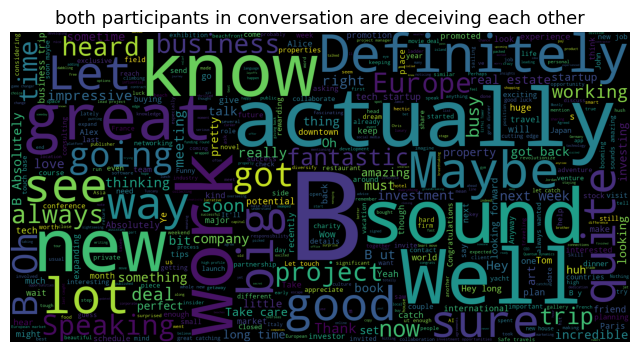

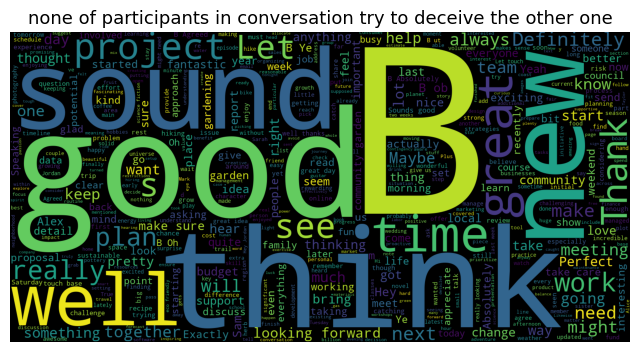

In [42]:
for title in df['category'].unique(): 
    data = df[df['category'] == title]['conversation']
    wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(data))  
    plt.figure(figsize = (8,6))
    plt.axis("off")
    plt.imshow(wc)
    plt.title(title,fontsize=13)
    plt.show()
    plt.close()
    

### There are some descriptions at the end of each conversation that must be removed!!!

In [43]:
# extracting the descriptions in parentheses and creating a new column 'description'
df['description'] = df['conversation'].str.extract(r'\(([^)]+)\)$')
 
# removing the descriptions from the 'conversation' column
df['conversation'] = df['conversation'].str.replace(r'\([^)]+\)$', '', regex=True).str.strip()

In [44]:
df['conversation'] = df['conversation'].str.replace(r'(\(.*\)$|[End of conversation].*$)', '', regex=True).str.strip()

In [45]:
df['conversation'] = df['conversation'].str.replace(r'(\(.*\)$|\[.*$)', '', regex=True).str.strip()

In [45]:
#print(df.loc[8]['conversation'])

In [46]:
df

,category,conversation,word_count,A_bad_intent,B_bad_intent,description
0,first participant in conversation is deceiving...,"A: Hey, I have something really important to t...",437,1.0,0.0,NaN
1,second participant in conversation is deceivin...,"A: Hey Sarah, I heard you recently went on a t...",368,0.0,1.0,NaN
2,both participants in conversation are deceivin...,"A: Hey, how have you been? It's been a while s...",400,1.0,1.0,NaN
3,none of participants in conversation try to de...,A: Hey Sarah! How was your weekend?\n\nB: Hi M...,494,0.0,0.0,NaN
4,first participant in conversation is deceiving...,A: Hey there! How are you doing today?\n\nB: H...,534,1.0,0.0,NaN
...,...,...,...,...,...,...
95,none of participants in conversation try to de...,A: Good morning! How are you today?\n\nB: I'm ...,714,0.0,0.0,NaN
96,first participant in conversation is deceiving...,"A: Hey, how have you been? I was just thinking...",560,1.0,0.0,NaN
97,second participant in conversation is deceivin...,"A: Hey, I've been thinking about that investme...",724,0.0,1.0,NaN
98,both participants in conversation are deceivin...,"A: Hey, long time no see! How have you been?\n...",556,1.0,1.0,Both A and B were deceiving each other through...


In [47]:
df['description'].unique()

array([nan,
       'Both A and B were deceiving each other throughout the conversation – A is not actually close to publishing a novel and B is not involved in a significant business deal or company expansion.'],
      dtype=object)

In [48]:
df.to_csv('conversation_dataset.csv', index = False)